In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

plt.rcParams['figure.figsize']=[14.0,7.0]

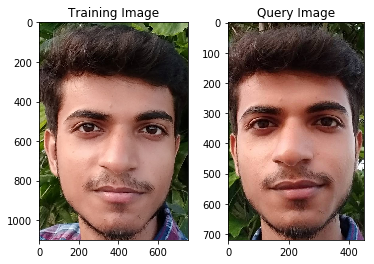

In [3]:
image1 = cv2.imread("./train.jpg")
image2 = cv2.imread("./query4.jpg")

image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image1 = image1[800:1900,550:1300]
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
image2 = image2[430:1150,300:750]
plt.subplot(121)
plt.title("Training Image")
plt.imshow(image1)
plt.subplot(122)
plt.title("Query Image")
plt.imshow(image2)
plt.show()

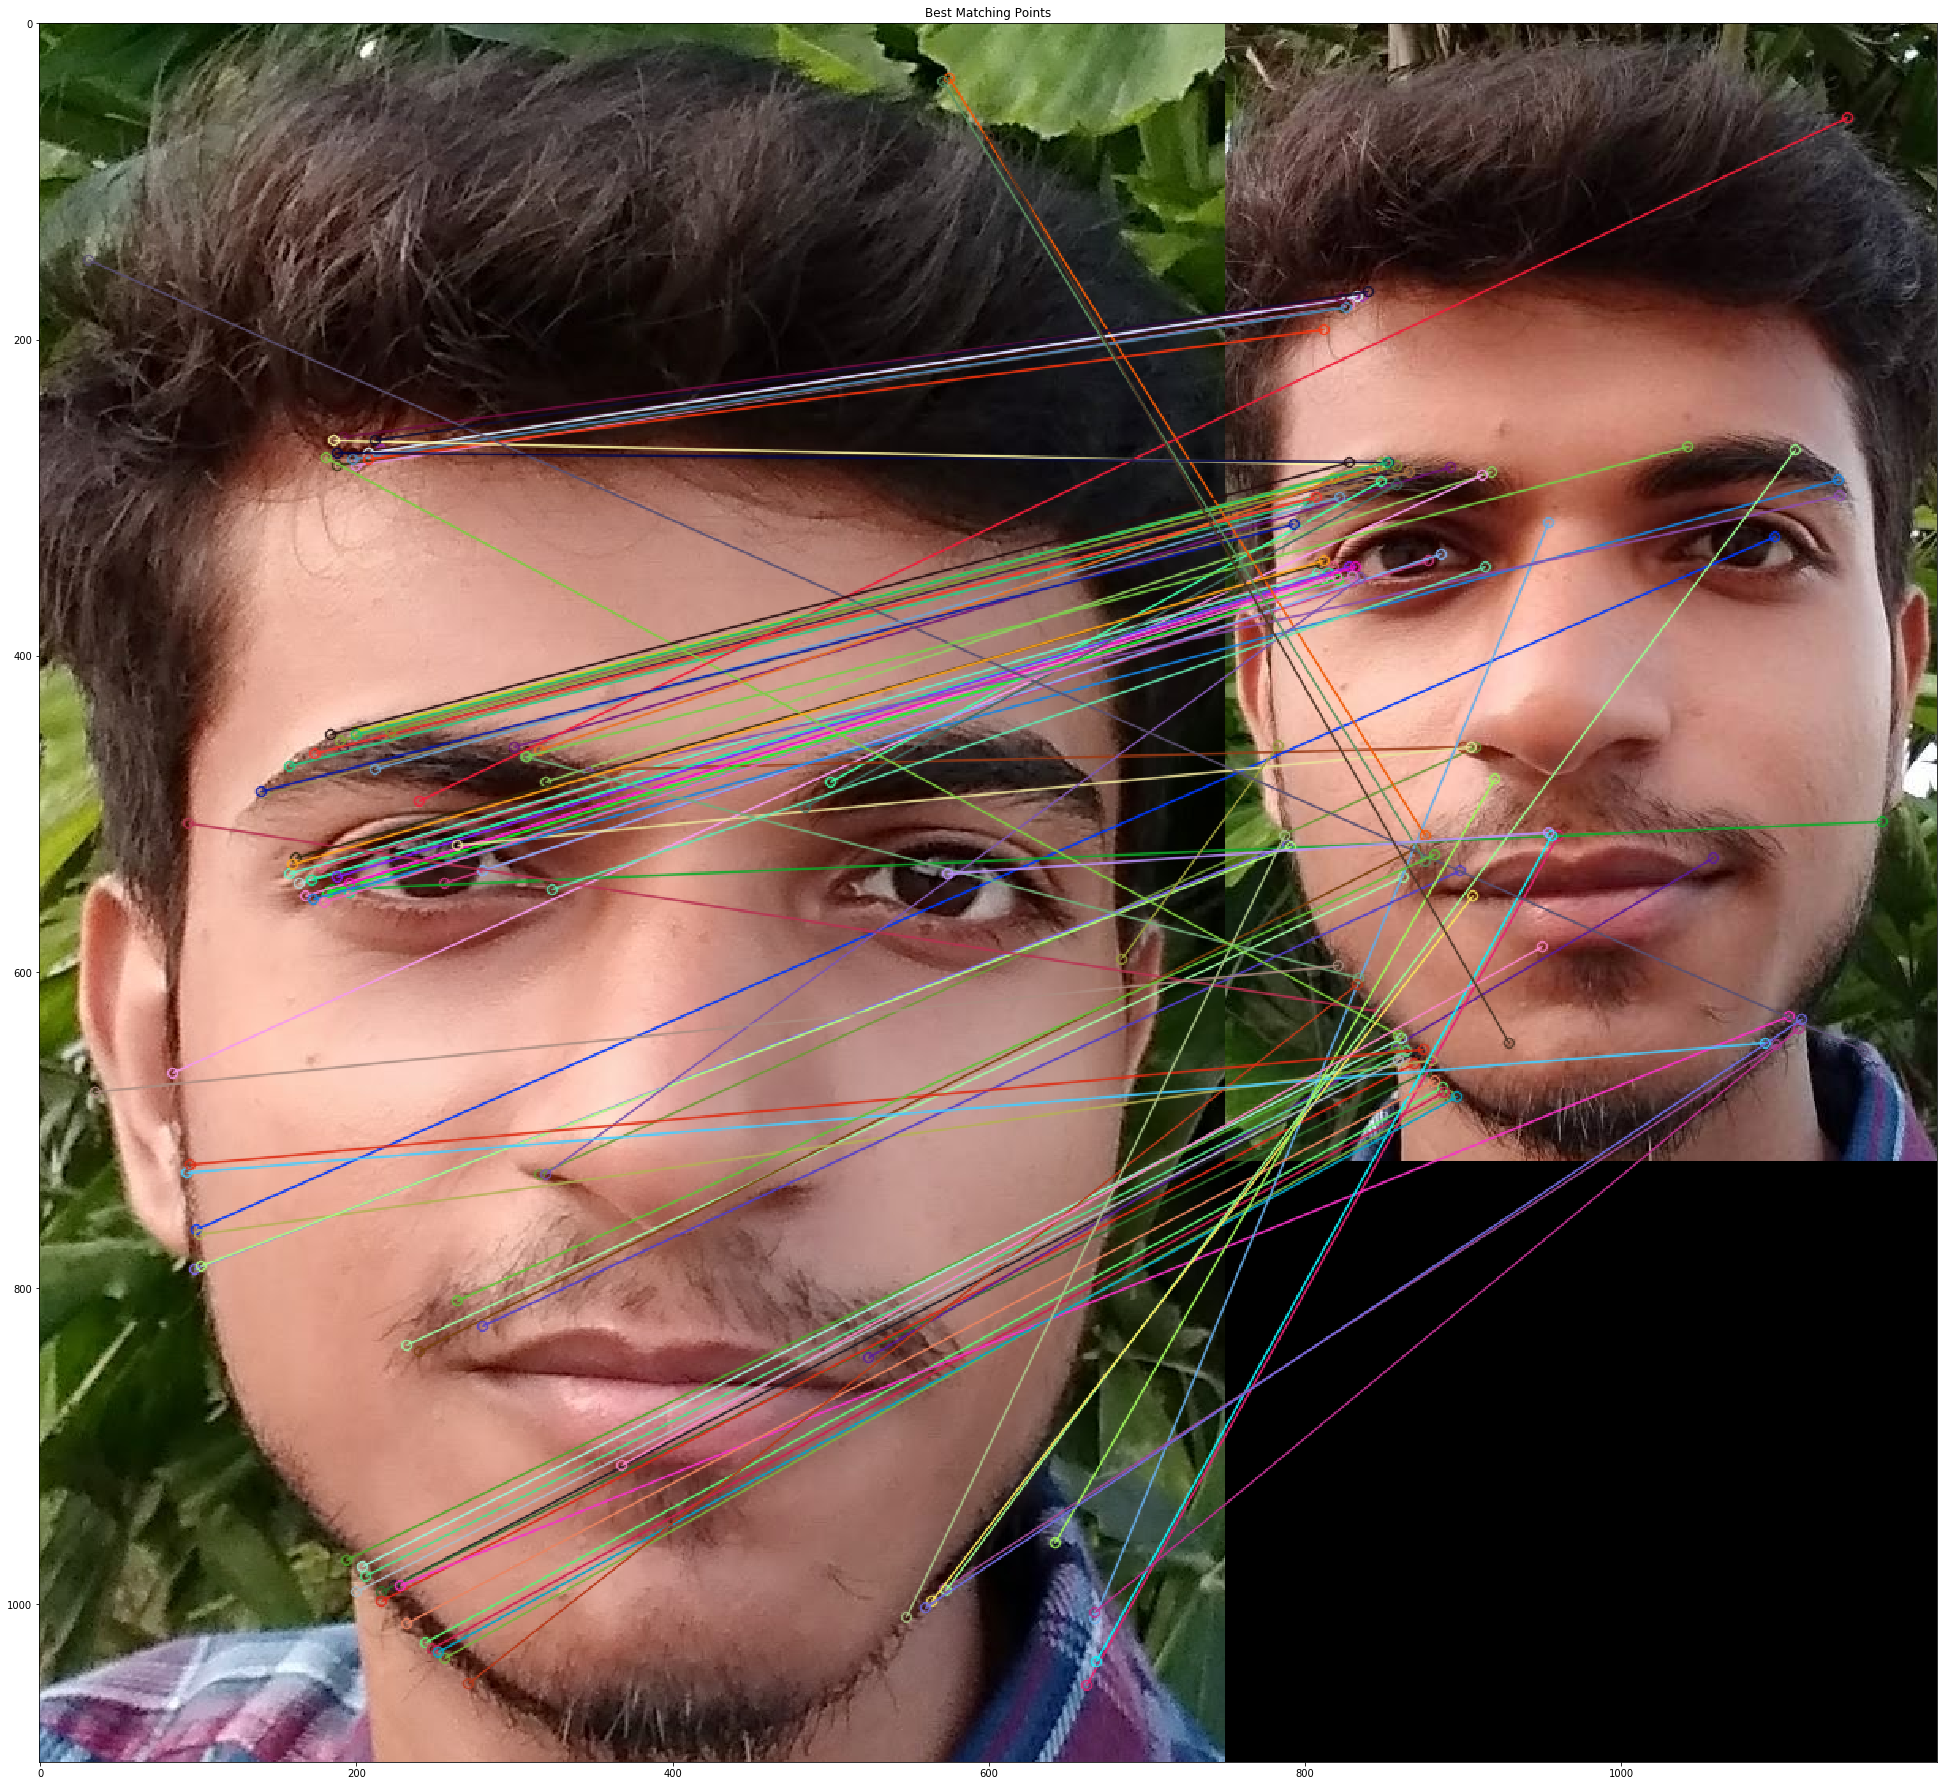

Number of keypoints in training image: 906
Number of keypoints in query image: 801

Number of matches between training and query image: 412


In [5]:
plt.rcParams['figure.figsize']=[34.0,34.0]

training_gray = cv2.cvtColor(image1,cv2.COLOR_RGB2GRAY)
query_gray = cv2.cvtColor(image2,cv2.COLOR_RGB2GRAY)

orb = cv2.ORB_create(1000,2.0)

bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

keypoints_train,descriptors_train = orb.detectAndCompute(training_gray,None)
keypoints_query,descriptors_query = orb.detectAndCompute(query_gray,None)

matches = bf.match(descriptors_train,descriptors_query)

matches = sorted(matches,key = lambda x:x.distance)

results = cv2.drawMatches(image1,keypoints_train,image2,keypoints_query,matches[:100],query_gray,flags=2)

plt.title("Best Matching Points")
plt.imshow(results)
plt.show()

print("Number of keypoints in training image:",len(keypoints_train))
print("Number of keypoints in query image:",len(keypoints_query))
print("\nNumber of matches between training and query image:",len(matches))
